In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
url2 = "https://gist.githubusercontent.com/wesleybeckner/a74dacd12b8087c4fc6ab5acc7acf032/raw/480ab2f648036ca562763f42ad68bd0f0db7760e/accelerometer.csv"
accel = pd.read_csv(url2, header=None)
accel.columns = ['time', 'x', 'y', 'z']

In [32]:
accel = np.genfromtxt(url2, delimiter=',')

In [40]:
url = [[100,0.1,0.4,-19.1], [100,0.1,0.4,19.1], [100,0.1,0.4,-19.1], [100,0.1,0.4,-19.1]]
accel = np.array(url)

In [41]:
## TODO: Code for loading and visualizing accelerometer data
z = np.array(accel[:,3])
t = np.array(accel[:,0])
points = np.diff(np.diff(z) < 0)
points = [i[0] for i in np.argwhere(points)]
points2 = [i[0] for i in np.argwhere(np.fabs(z[1:-1][points])>1)]
steps = 0
for index, time in enumerate(t[1:-1][points][points2][:-1]):
    if (z[1:-1][points][points2][index] > 0 and 
        z[1:-1][points][points2][index+1] < 0):
        time_down = t[1:-1][points][points2][index+1]

        # if the time delta is less than 1 sec
#         if time_down - time <= 1:
        steps += 1
print(steps)

1


14


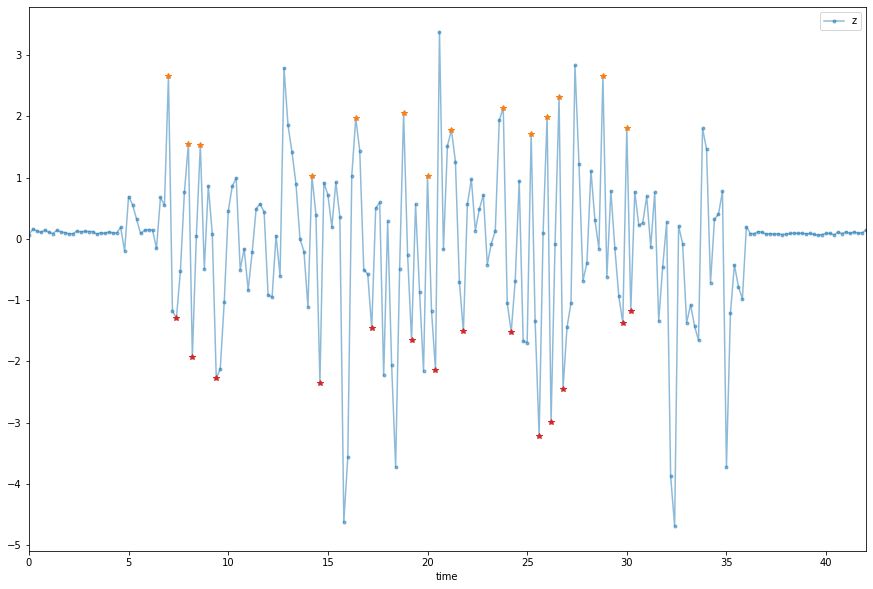

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(15,10))
accel.plot('time', 'z', ax=ax, alpha=0.5, marker='.')
steps = 0
for index, time in enumerate(t[1:-1][points][points2][:-1]):

  # if there's an up/down pair
  if z[1:-1][points][points2][index] > 0 and z[1:-1][points][points2][index+1] < 0:
    time_down = t[1:-1][points][points2][index+1]

    # if the time delta is less than 1 sec
    if time_down - time <= 1:
      step_up = z[1:-1][points][points2][index]
      step_down = z[1:-1][points][points2][index+1]
      steps += 1
      ax.plot(time,step_up, ls='', marker='*', color='tab:orange')
      ax.plot(time_down,step_down, ls='', marker='*', color='tab:red')
print(steps)